In [1]:
import pandas as pd # data analysis and manipulation tools

reviews = pd.read_csv("data/02-wine-reviews.csv", index_col=0)
reviews.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


# Univariate plotting

<AxesSubplot:>

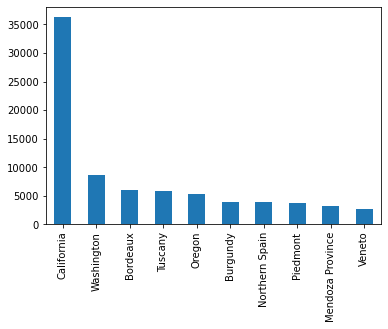

In [2]:
# Bar charts and categorical data
reviews['province'].value_counts().head(10).plot.bar()

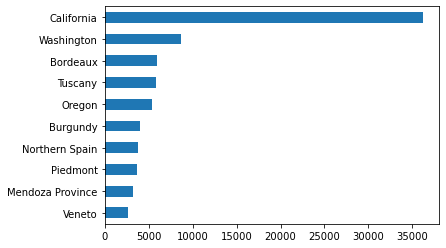

In [3]:
# Horisontal bar charts 
ax = reviews['province'].value_counts().head(10).plot.barh()
ax.invert_yaxis()

<AxesSubplot:>

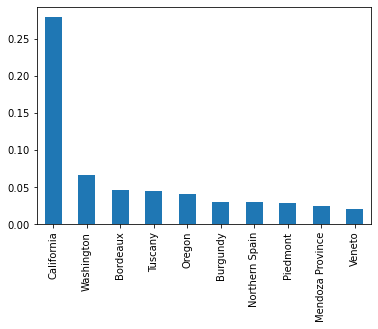

In [4]:
# The bar chart with relative proportions
(reviews['province'].value_counts().head(10) / len(reviews)).plot.bar()

<AxesSubplot:ylabel='province'>

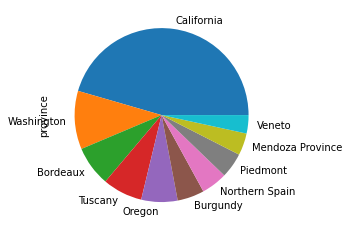

In [5]:
# Pie chart
reviews['province'].value_counts().head(10).plot.pie()

<AxesSubplot:>

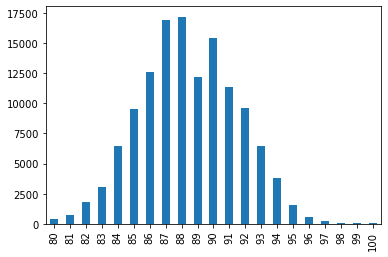

In [6]:
# The case with ordinal categories or numerical scale
reviews['points'].value_counts().sort_index().plot.bar()

<AxesSubplot:>

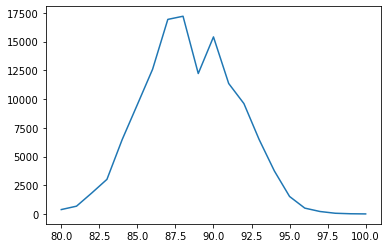

In [7]:
# For numerical data the bar chart is not the best option
reviews['points'].value_counts().sort_index().plot.line()

<AxesSubplot:>

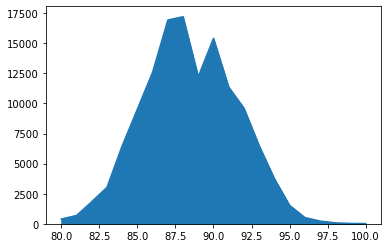

In [8]:
# And another option
reviews['points'].value_counts().sort_index().plot.area()

<AxesSubplot:ylabel='Frequency'>

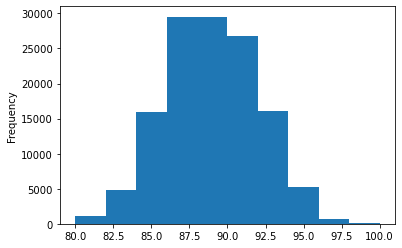

In [9]:
# Histogram for interval data
reviews['points'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

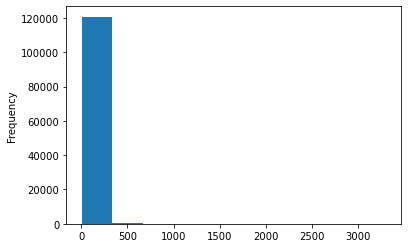

In [10]:
# The problem with skewed data
reviews['price'].plot.hist()

In [11]:
reviews[reviews['price'] > 1500]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
1558,France,"A massive wine for Margaux, packed with tannin...",NaN,98,1900.0,Bordeaux,Margaux,NaN,Roger Voss,@vossroger,Château Margaux 2009 Margaux,Bordeaux-style Red Blend,Château Margaux
15840,France,The wine is a velvet glove in an iron fist. Th...,NaN,96,2500.0,Bordeaux,Pomerol,NaN,Roger Voss,@vossroger,Château Pétrus 2014 Pomerol,Bordeaux-style Red Blend,Château Pétrus
65352,France,This extravagantly perfumed wine has great jui...,NaN,97,2000.0,Bordeaux,Pomerol,NaN,Roger Voss,@vossroger,Château Pétrus 2011 Pomerol,Bordeaux-style Red Blend,Château Pétrus
80290,France,This ripe wine shows plenty of blackberry frui...,NaN,88,3300.0,Bordeaux,Médoc,NaN,Roger Voss,@vossroger,Château les Ormes Sorbet 2013 Médoc,Bordeaux-style Red Blend,Château les Ormes Sorbet
98380,France,"A superb wine from a great year, this is power...",NaN,96,2500.0,Burgundy,La Romanée,NaN,Roger Voss,@vossroger,Domaine du Comte Liger-Belair 2010 La Romanée,Pinot Noir,Domaine du Comte Liger-Belair
113564,France,"A wonderfully complete wine, with all the elem...",NaN,96,2000.0,Burgundy,La Romanée,NaN,Roger Voss,@vossroger,Domaine du Comte Liger-Belair 2005 La Romanée,Pinot Noir,Domaine du Comte Liger-Belair
120391,US,The nose on this single-vineyard wine from a s...,Roger Rose Vineyard,91,2013.0,California,Arroyo Seco,Central Coast,Matt Kettmann,@mattkettmann,Blair 2013 Roger Rose Vineyard Chardonnay (Arr...,Chardonnay,Blair


<AxesSubplot:ylabel='Frequency'>

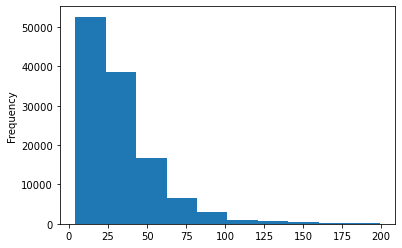

In [12]:
# How deal with the issue 
reviews[reviews['price'] < 200]['price'].plot.hist()

# Bivariate plotting

<AxesSubplot:xlabel='price', ylabel='points'>

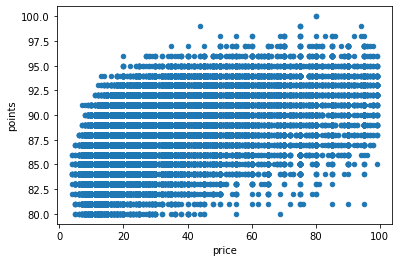

In [13]:
# Scatter plot simply maps each variable of interest to a point in two-dimensional space
reviews[reviews['price'] < 100].plot.scatter(x='price', y='points')

<AxesSubplot:xlabel='price', ylabel='points'>

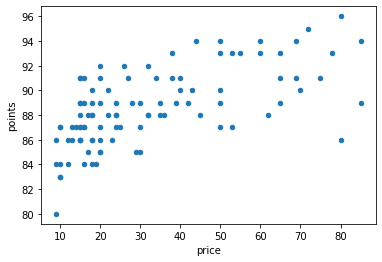

In [14]:
# Scatter plot with downsample
reviews[reviews['price'] < 100].sample(100).plot.scatter(x='price', y='points')

<AxesSubplot:xlabel='price', ylabel='points'>

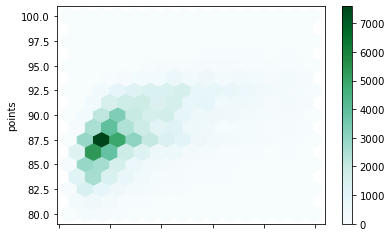

In [15]:
# A hex plot is a scatter plot with points aggregation
reviews[reviews['price'] < 100].plot.hexbin(x='price', y='points', gridsize=15)

In [16]:
wine_counts = pd.read_csv("data/02-top-five-wine-score-counts.csv", index_col=0)
wine_counts.head()

,Bordeaux-style Red Blend,Cabernet Sauvignon,Chardonnay,Pinot Noir,Red Blend
points,,,,,
80,5.0,87.0,68.0,36.0,72.0
81,18.0,159.0,150.0,83.0,107.0
82,72.0,435.0,517.0,295.0,223.0
83,95.0,570.0,669.0,346.0,364.0
84,268.0,923.0,1146.0,733.0,602.0


<AxesSubplot:xlabel='points'>

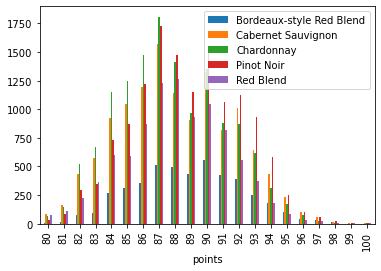

In [17]:
# Bar chart
wine_counts.plot.bar()

<AxesSubplot:xlabel='points'>

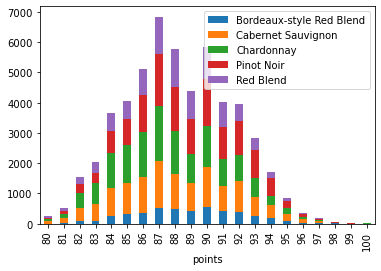

In [18]:
# Stacked bar chart
wine_counts.plot.bar(stacked=True)

<AxesSubplot:xlabel='points'>

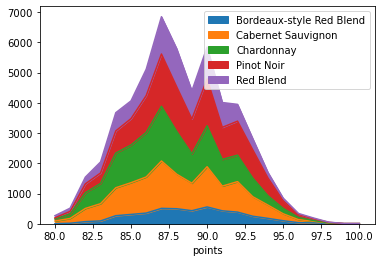

In [19]:
# Area plot 
wine_counts.plot.area()

<AxesSubplot:xlabel='points'>

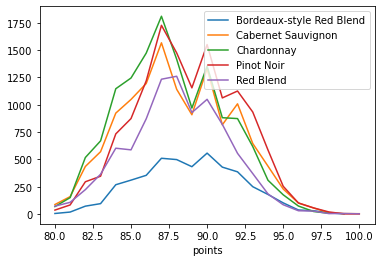

In [20]:
# Bivariate line chart
wine_counts.plot.line()

# Drawing with Seaborn

In [21]:
import seaborn as sns # data visualization library

<AxesSubplot:xlabel='points', ylabel='count'>

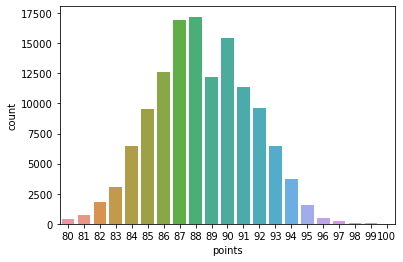

In [22]:
# Bar chart
sns.countplot(x=reviews['points'])

<AxesSubplot:xlabel='price', ylabel='Density'>

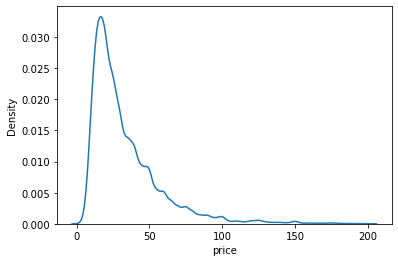

In [23]:
# Line chart
sns.kdeplot(reviews.query('price < 200').price)

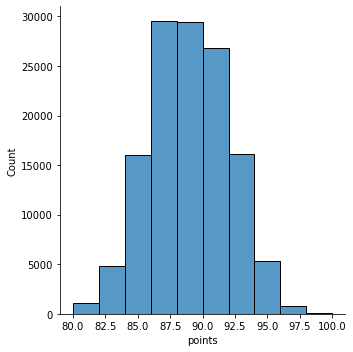

In [24]:
# Histogram 
sns.displot(x=reviews['points'], bins=10, kde=False)

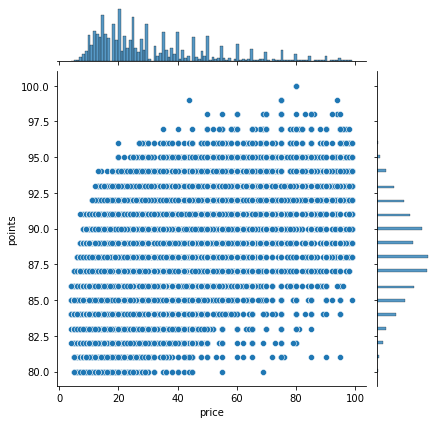

In [25]:
# Scatter plot
sns.jointplot(x='price', y='points', data=reviews[reviews['price'] < 100])

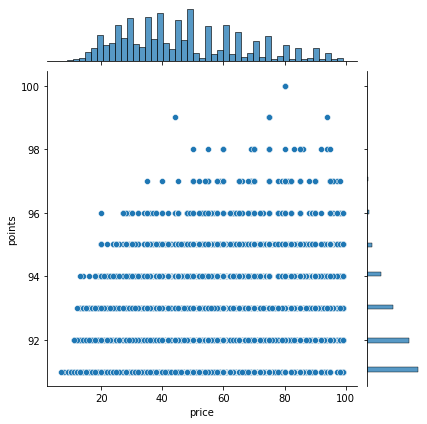

In [26]:
# Scatter plot with two conditions
sns.jointplot(x='price', y='points', data=reviews.loc[(reviews['price'] < 100) & 
                                                      (reviews['points'] > 90)])

<AxesSubplot:xlabel='variety', ylabel='points'>

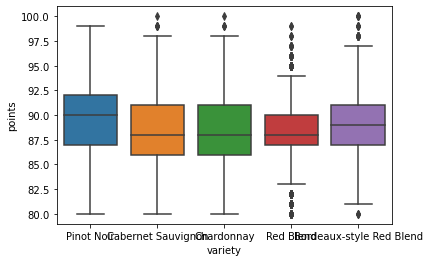

In [27]:
# Box plot
df = reviews[reviews.variety.isin(reviews.variety.value_counts().head(5).index)]

sns.boxplot(x='variety', y='points', data=df)

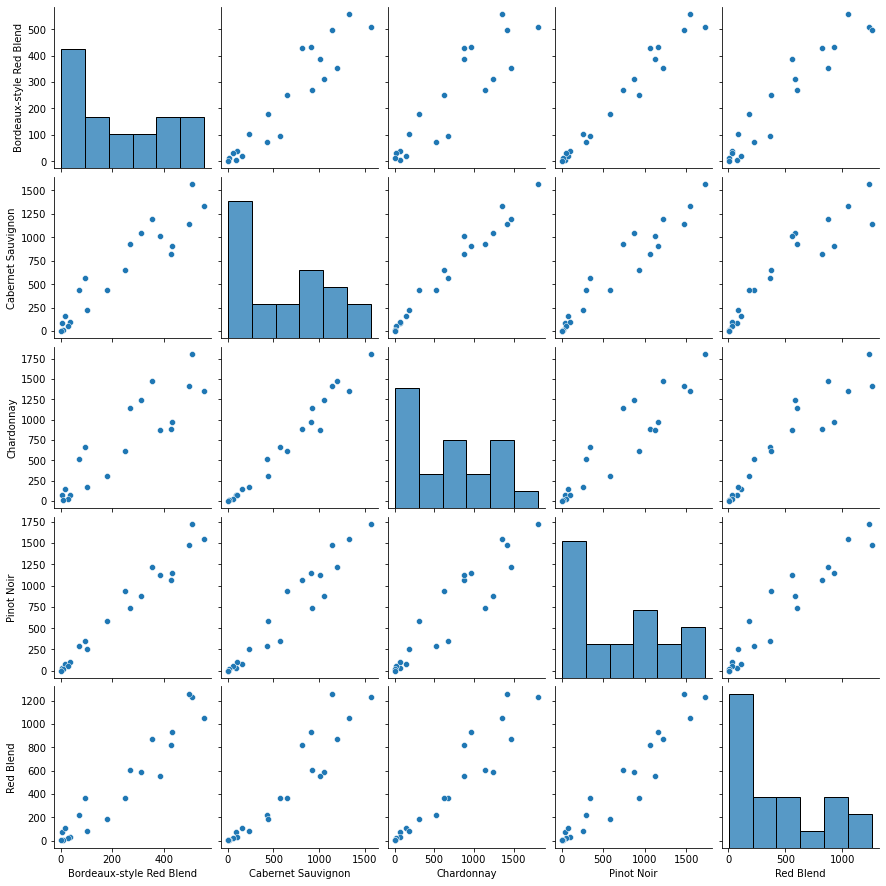

In [28]:
# Pairplot
sns.pairplot(wine_counts)

<AxesSubplot:>

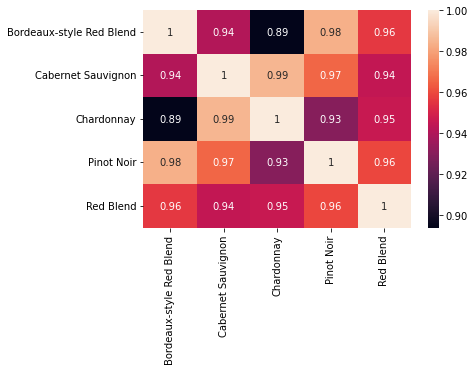

In [29]:
# Heat map for correlation visualization
corr = wine_counts.corr()
sns.heatmap(corr, annot = True)

# Drawing with Matplotlib

In [30]:
import matplotlib.pyplot as plt

%matplotlib inline

(array([ 1089.,  4861., 16010., 29533., 29433., 26769., 16102.,  5293.,
          752.,   129.]),
 array([ 80.,  82.,  84.,  86.,  88.,  90.,  92.,  94.,  96.,  98., 100.]),
 <BarContainer object of 10 artists>)

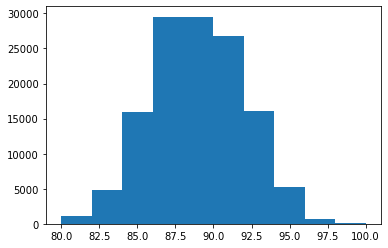

In [31]:
plt.hist(reviews['points'])

(array([ 1089.,  4861., 16010., 29533., 29433., 26769., 16102.,  5293.,
          752.,   129.]),
 array([ 80.,  82.,  84.,  86.,  88.,  90.,  92.,  94.,  96.,  98., 100.]),
 <BarContainer object of 10 artists>)

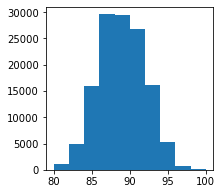

In [32]:
# To change the figure size you should use the argument for figure()

plt.figure(figsize=(3, 3)) # e.g., figuresize=(3,3)
plt.hist(reviews['points'])

(array([ 1089.,  4861., 16010., 29533., 29433., 26769., 16102.,  5293.,
          752.,   129.]),
 array([ 80.,  82.,  84.,  86.,  88.,  90.,  92.,  94.,  96.,  98., 100.]),
 <BarContainer object of 10 artists>)

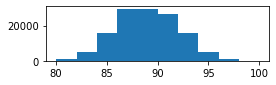

In [33]:
# You can also change the scale for each axis separately
f = plt.figure()
f.set_figwidth(4)
f.set_figheight(1)

plt.hist(reviews['points'])

Text(0, 0.5, 'Records')

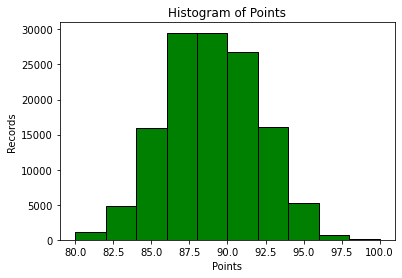

In [34]:
# We can define the number of bins

# matplotlib histogram
plt.hist(reviews['points'], color = 'green', edgecolor = 'black',
         bins = 10) # e.g., the histo with 10 bins

# Add labels
plt.title('Histogram of Points')
plt.xlabel('Points')
plt.ylabel('Records')

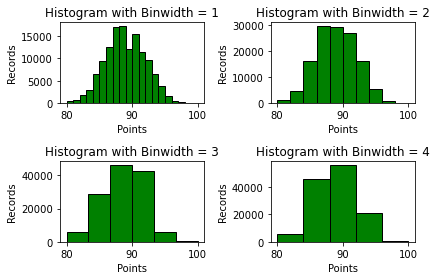

In [35]:
# Let's see 4 different binwidths
points_range = reviews['points'].max() - reviews['points'].min()

for i, binwidth in enumerate([1, 2, 3, 4]):
    
    # Set up the plot
    ax = plt.subplot(2, 2, i + 1)
    
    # Draw the plot
    ax.hist(reviews['points'], bins = int(points_range/binwidth),
             color = 'green', edgecolor = 'black')
    
    # Title and labels
    ax.set_title('Histogram with Binwidth = %d' % binwidth)
    ax.set_xlabel('Points')
    ax.set_ylabel('Records')

plt.tight_layout()
plt.show()

<b>Recommendation</b>:
See examlpes at https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.show.html